In [275]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [276]:
print('Loading MNIST')
iris = load_iris()
# Creating classifier
clf = SGDClassifier(alpha=0.001, max_iter=100)

Loading MNIST


Training classifier using first 30 samples of each class
Training data accuracy 0.9
Test data accuracy is 0.9333333333333333


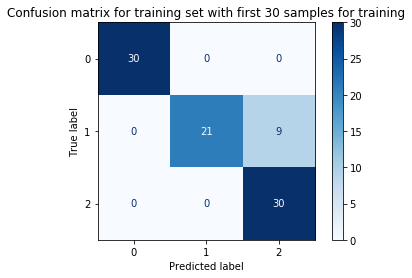

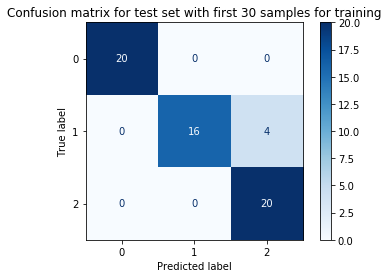

In [277]:
print('Training classifier using first 30 samples of each class')
X = iris.data
Y = iris.target
X_train = np.concatenate((X[:30],X[50:80],X[100:130]))
X_test = np.concatenate((X[30:50],X[80:100],X[130:150]))

Y_train = np.concatenate((Y[:30], Y[50:80], Y[100:130]), axis=None)
Y_test = np.concatenate((Y[30:50], Y[80:100], Y[130:150]), axis=None)

clf.fit(X_train, Y_train)

print(f'Training data accuracy {clf.score(X_train, Y_train)}')
print(f'Test data accuracy is {clf.score(X_test, Y_test)}')

disp = plot_confusion_matrix(clf, X_train, Y_train,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for training set with first 30 samples for training")
plt.savefig('confusion_matrix_first30training_trainingset.png')
disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for test set with first 30 samples for training")
plt.savefig('confusion_matrix_first30training_testset.png')
plt.show()


Training classifier using last 30 samples of each class
Training data accuracy 0.9222222222222223
Test data accuracy is 0.9666666666666667


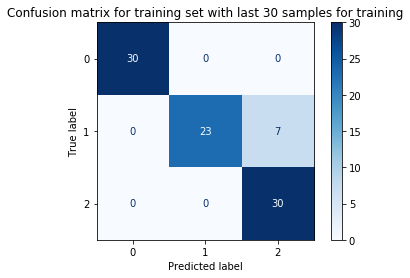

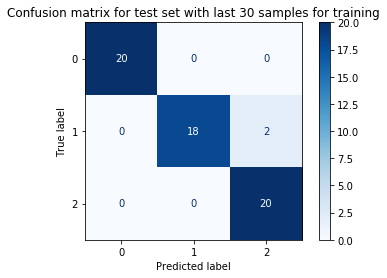

In [278]:
print('Training classifier using last 30 samples of each class')
X = iris.data
Y = iris.target
X_test = np.concatenate((X[:20],X[50:70],X[100:120]))
X_train = np.concatenate((X[20:50],X[70:100],X[120:150]))

Y_test = np.concatenate((Y[:20], Y[50:70], Y[100:120]), axis=None)
Y_train = np.concatenate((Y[20:50], Y[70:100], Y[120:150]), axis=None)

clf.fit(X_train, Y_train)

print(f'Training data accuracy {clf.score(X_train, Y_train)}')
print(f'Test data accuracy is {clf.score(X_test, Y_test)}')

disp = plot_confusion_matrix(clf, X_train, Y_train,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for training set with last 30 samples for training")
plt.savefig('confusion_matrix_last30training_trainingset.png')
disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for test set with last 30 samples for training")
plt.savefig('confusion_matrix_last30training_testset.png')
plt.show()

Plotting histograms


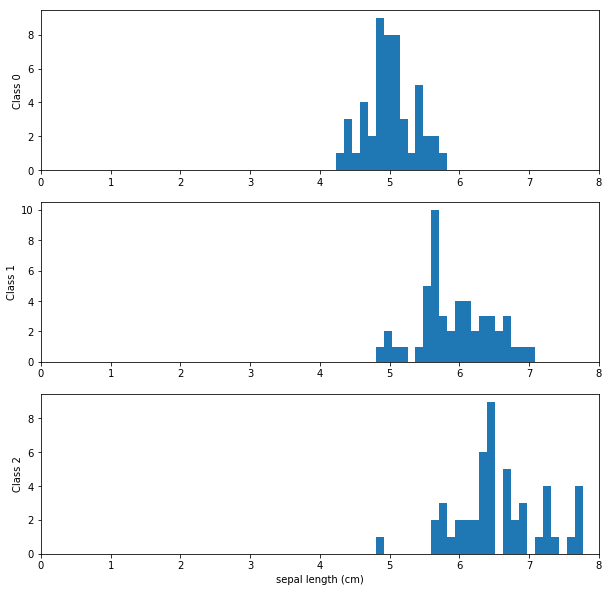

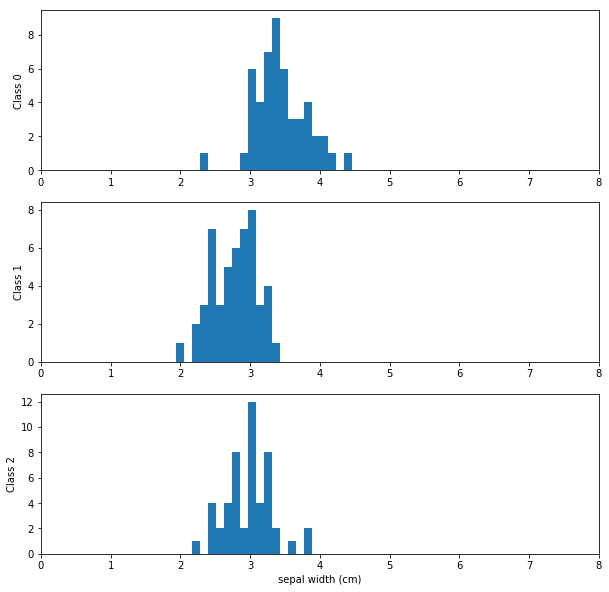

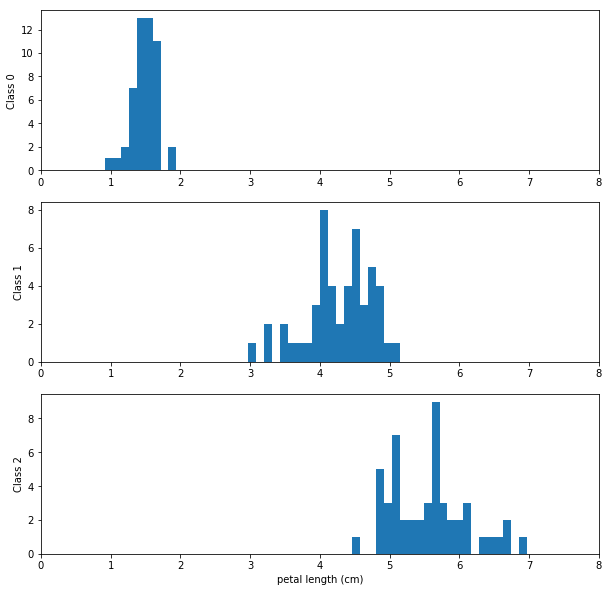

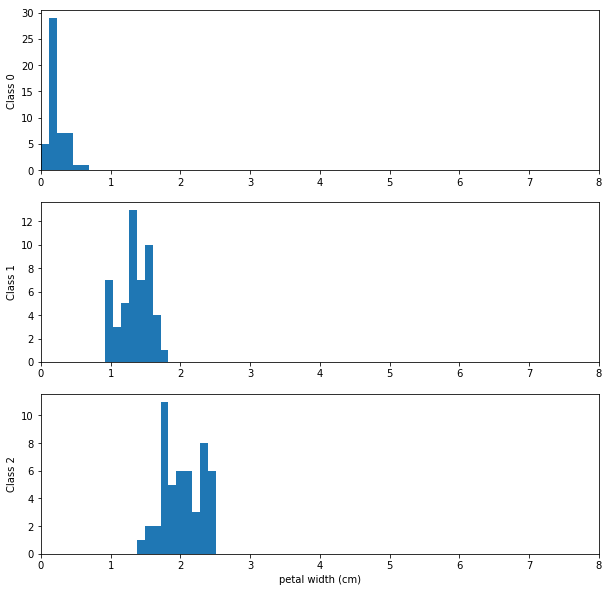

In [279]:
print("Plotting histograms")
min = 0
max = 8
bins = np.arange(min, max, max/70)


for feature in range(0,4):
    fig, axs = plt.subplots(3,1)
    fig.set_size_inches(10,10)
    for i,ax in enumerate(axs.flat):
        ax.hist(iris.data[iris.target==i,feature],bins=bins)
        ax.set_ylabel(f'Class {i}')
        ax.set_xlim((min,max))
    plt.xlabel(iris.feature_names[feature])
    plt.savefig(f'histogram_feature{feature}.png')
    plt.show()

Removing feature 1
Training data accuracy is 0.8222222222222222
Test data accuracy is 0.8666666666666667


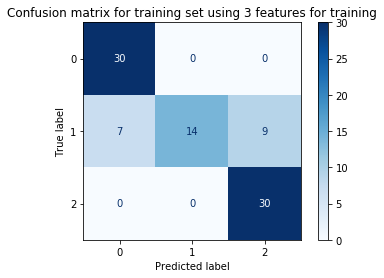

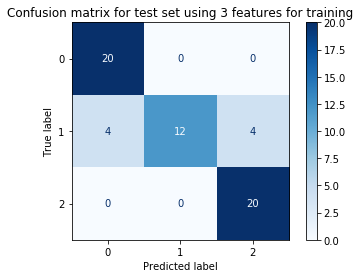

In [280]:
print("Removing feature 1")
X = iris.data
Y = iris.target
X_train = np.concatenate((X[:30,[0,2,3]],X[50:80,[0,2,3]],X[100:130,[0,2,3]]))
X_test = np.concatenate((X[30:50,[0,2,3]],X[80:100,[0,2,3]],X[130:150,[0,2,3]]))

Y_train = np.concatenate((Y[:30], Y[50:80], Y[100:130]), axis=None)
Y_test = np.concatenate((Y[30:50], Y[80:100], Y[130:150]), axis=None)

clf.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = clf.predict(X_test)
Y_pred_train = clf.predict(X_train)

print(f'Training data accuracy is {clf.score(X_train, Y_train)}')
print(f'Test data accuracy is {clf.score(X_test, Y_test)}')

disp = plot_confusion_matrix(clf, X_train, Y_train,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for training set using 3 features for training")
plt.savefig('confusion_matrix_3features_trainingset.png')
disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for test set using 3 features for training")
plt.savefig('confusion_matrix_3features_testset.png')
plt.show()

Removing feature 0
Training data accuracy is 0.9333333333333333
Test data accuracy is 0.9333333333333333


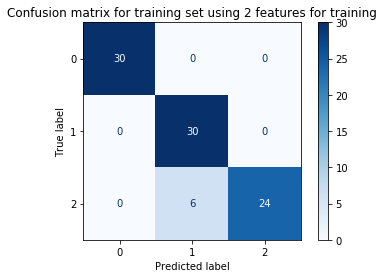

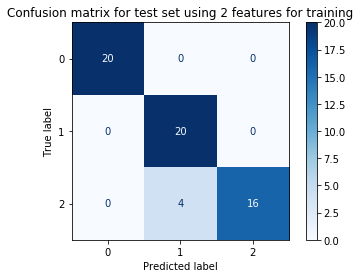

In [281]:
print("Removing feature 0")
X = iris.data
Y = iris.target
X_train = np.concatenate((X[:30,[2,3]],X[50:80,[2,3]],X[100:130,[2,3]]))
X_test = np.concatenate((X[30:50,[2,3]],X[80:100,[2,3]],X[130:150,[2,3]]))

Y_train = np.concatenate((Y[:30], Y[50:80], Y[100:130]), axis=None)
Y_test = np.concatenate((Y[30:50], Y[80:100], Y[130:150]), axis=None)

clf.fit(X_train, Y_train)

print(f'Training data accuracy is {clf.score(X_train, Y_train)}')
print(f'Test data accuracy is {clf.score(X_test, Y_test)}')

disp = plot_confusion_matrix(clf, X_train, Y_train,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for training set using 2 features for training")
plt.savefig('confusion_matrix_2features_trainingset.png')
disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for test set using 2 features for training")
plt.savefig('confusion_matrix_2features_testset.png')
plt.show()

Removing feature 3
Training data accuracy is 0.9333333333333333
Test data accuracy is 0.9833333333333333


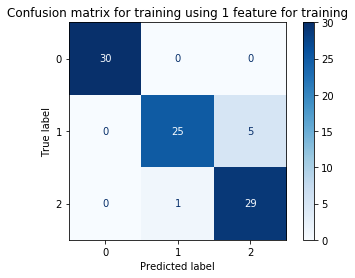

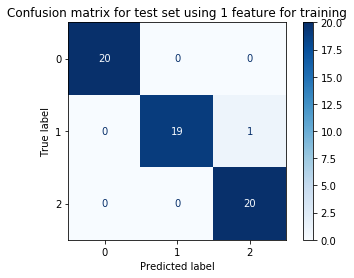

In [282]:
print("Removing feature 3")

X = iris.data
Y = iris.target
X_train = np.concatenate((X[:30,[2]],X[50:80,[2]],X[100:130,[2]])).reshape(-1,1)
X_test = np.concatenate((X[30:50,[2]],X[80:100,[2]],X[130:150,[2]])).reshape(-1,1)

Y_train = np.concatenate((Y[:30], Y[50:80], Y[100:130]), axis=None)
Y_test = np.concatenate((Y[30:50], Y[80:100], Y[130:150]), axis=None)

clf.fit(X_train, Y_train)

# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm_train = confusion_matrix(Y_train, Y_pred_train)

train_accuracy = clf.score(X_train, Y_train)
test_accuracy = clf.score(X_test, Y_test)
print(f'Training data accuracy is {train_accuracy}')
print(f'Test data accuracy is {test_accuracy}')

disp = plot_confusion_matrix(clf, X_train, Y_train,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for training using 1 feature for training")
plt.savefig('confusion_matrix_1feature_trainingset.png')
disp = plot_confusion_matrix(clf, X_test, Y_test,
                             display_labels=[0,1,2],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title("Confusion matrix for test set using 1 feature for training")
plt.savefig('confusion_matrix_1feature_testset.png')
plt.show()